### 1. Dự đoán giá nhà theo diện tích 

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt('my_house_price_prediction.csv', delimiter=',')

m = data.shape[0]
n = data.shape[1]

x = data[:, 0]
y = data[:, 1]
X = np.c_[np.ones((m, 1)), x]

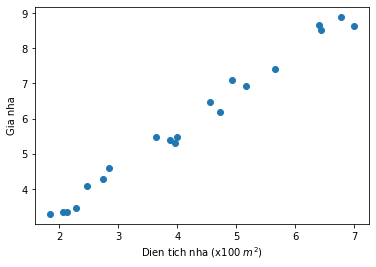

In [3]:
plt.scatter(x, y)
plt.xlabel('Dien tich nha (x100 $m^2$)')
plt.ylabel('Gia nha')
plt.show()

In [4]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
# m = 20
# n = 2

X.shape: (20, 2)
y.shape: (20,)


### Cài theo cách dùng chỉ mục index 

In [5]:
# No vectorization - batch gradien descent

theta = np.random.randn(n)

# loss function

def loss_function(theta = theta, x = X, y = y, m = m, n = n):
    loss = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i += theta[j] * X[i, j]
        loss_i = (hypo_i - y[i]) ** 2
        loss += loss_i
    loss = (1 / m) * loss
    
    return loss

In [6]:
# training
learning_rate = 0.01
theta = np.ones(n)
loss_list = []
epoches = 50

In [7]:
for itr in range(epoches):
    dev_list = []
    for k in range(n):
        dev_sum = 0
        for i in range(m):
            # Feed forward
            hypo_i = 0
            for j in range(n):
                hypo_i += theta[j]*X[i, j]
                
            # Derivative 
            dev_i = (hypo_i - y[i]) * X[i, k]
            dev_sum += dev_i
            
        dev_sum = (2 / m) * dev_sum
        dev_list.append(dev_sum)
    
    theta = theta - learning_rate * np.array(dev_list)
    loss_val = loss_function(theta)
    loss_list.append(loss_val)

Text(0, 0.5, 'Gia tri loss')

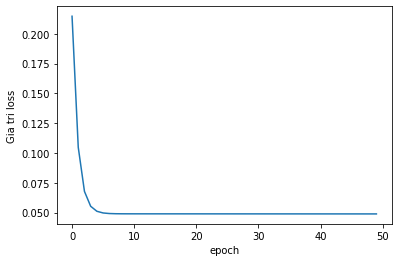

In [8]:
plt.plot(np.arange(0, epoches), loss_list)
plt.xlabel('epoch')
plt.ylabel('Gia tri loss')

In [9]:
print(dev_list)

[-0.012954097662872189, 0.002705885811926745]
